In [64]:
import pandas as pd;
import numpy  as np;
import math;
from scipy import signal;
import matplotlib.pyplot as plt;
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import warnings

In [65]:
pd.options.mode.chained_assignment = None;

user_balance_table = pd.read_csv(r"./user_balance_table.csv", sep=',', engine='python', encoding='utf-8',
                                 parse_dates=['report_date']);
user_balance_table = user_balance_table.fillna(0);

In [66]:
user_balance = user_balance_table.groupby(['report_date']);
data_total = user_balance['total_purchase_amt', 'total_redeem_amt'].sum();

In [67]:
data_total = pd.concat([data_total], axis=1);
data_total

,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [68]:
data_train = data_total['2013-07':'2014-07']
data_test = data_total['2014-08':]

begin ARMA


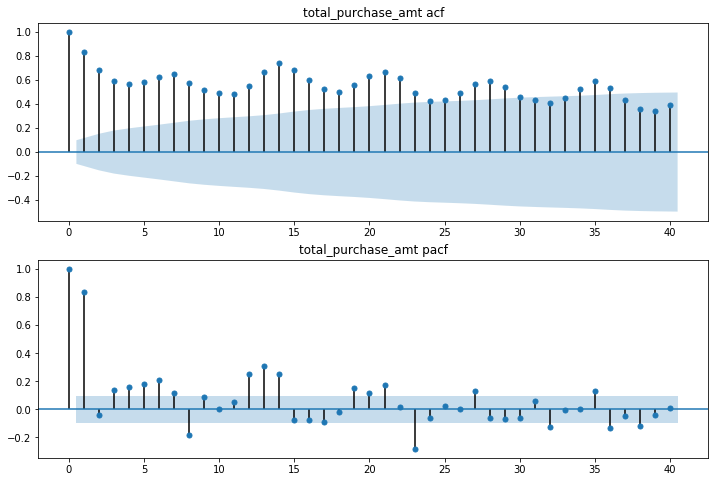

In [69]:
purchase_data_train = pd.DataFrame(data_train['total_purchase_amt'])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(purchase_data_train,lags=40,
                            title='total_purchase_amt acf',ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(purchase_data_train,lags=40,
                            title='total_purchase_amt pacf',ax=ax2)

purchase_data_train = purchase_data_train.astype('float64')

print('begin ARMA');

In [70]:
'''
warnings.filterwarnings("ignore")
for p in range(0,15):
    for q in range(0,15):
        if(p!=q):
            try:
                arma_model = sm.tsa.ARMA(redeem_data1403to1406,(p,q)).fit();
                print('redeem ARMA(%d,%d)AIC:%f BIC:%f HQOC:%f'%(p,q,arma_model.aic,arma_model.bic,arma_model.hqic));
            except:
                continue 


for p in range(0,15):
    for q in range(0,8):
        if(p!=q):
            try:            
                arma_model = sm.tsa.ARMA(purchase_data1403to1406,(p,q)).fit();
                print('purchase ARMA(%d,%d)AIC:%f BIC:%f HQOC:%f'%(p,q,arma_model.aic,arma_model.bic,arma_model.hqic));
            except:
                continue
'''

'\nwarnings.filterwarnings("ignore")\nfor p in range(0,15):\n    for q in range(0,15):\n        if(p!=q):\n            try:\n                arma_model = sm.tsa.ARMA(redeem_data1403to1406,(p,q)).fit();\n                print(\'redeem ARMA(%d,%d)AIC:%f BIC:%f HQOC:%f\'%(p,q,arma_model.aic,arma_model.bic,arma_model.hqic));\n            except:\n                continue \n\n\nfor p in range(0,15):\n    for q in range(0,8):\n        if(p!=q):\n            try:            \n                arma_model = sm.tsa.ARMA(purchase_data1403to1406,(p,q)).fit();\n                print(\'purchase ARMA(%d,%d)AIC:%f BIC:%f HQOC:%f\'%(p,q,arma_model.aic,arma_model.bic,arma_model.hqic));\n            except:\n                continue\n'

PURCHASE

In [71]:
warnings.filterwarnings("ignore")
purchase_arma_model = sm.tsa.ARMA(purchase_data_train, (8,5)).fit()
purchase_resid = purchase_arma_model.resid;

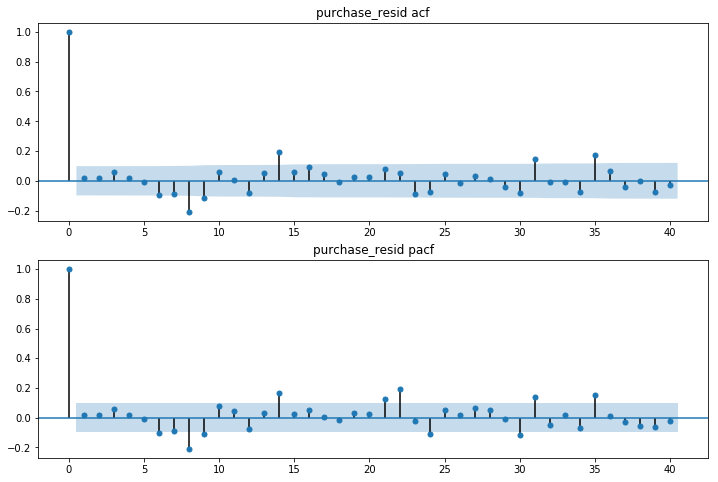

In [72]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(purchase_resid.values.squeeze(),
                    lags=40, title='purchase_resid acf', ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(purchase_resid, lags=40,
                    title='purchase_resid pacf', ax=ax2)

In [73]:
print(sm.stats.durbin_watson(purchase_resid.values))

1.9520491706875702


Text(0.5,1,'purchase_resid Q-Q')

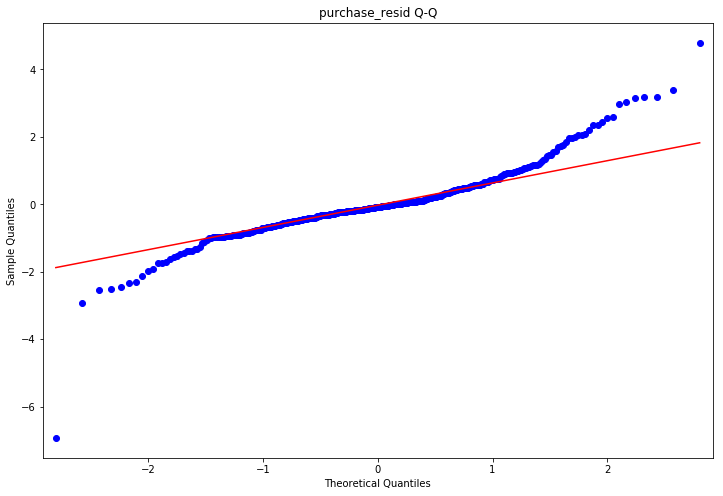

In [74]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.qqplot(purchase_resid, line='q', ax=ax, fit=True)
plt.title('purchase_resid Q-Q')

purchase_error [0.57524642 0.1756677  0.22448596 0.25276148 0.32932856 0.05744247
 0.01067993 0.32211342 0.08739461 0.351962   0.29284144 0.12690881
 0.01265734 0.00747916 0.29520896 0.2531639  0.25660484 0.25434044
 0.10640006 0.12328104 0.03513392 0.23525944 0.05775562 0.49207312
 0.27319677 0.07458498 0.06798378 0.05594547 0.27160653 0.24440112
 0.31675363]
MAE: 0.20131170632657905 VAR: 0.019389878152421172 STD: 0.13924754271591716


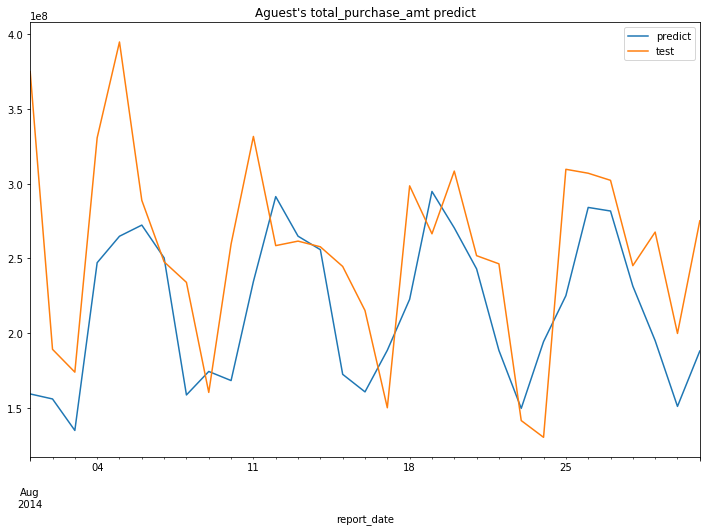

In [76]:
purchase_predict = purchase_arma_model.predict('2014-08-01', '2014-08-31', dynamic=False);
fig, ax = plt.subplots(figsize=(12, 8));
purchase_predict.plot(ax=ax, label='predict');
data_test['total_purchase_amt'].plot(ax=ax, label='test');
plt.legend();
plt.title('Aguest\'s total_purchase_amt predict')
plt.draw();
purchase_error = np.divide(np.abs(np.array(data_test['total_purchase_amt'])
- np.array(purchase_predict).T), np.array(data_test['total_purchase_amt']))
print('purchase_error',purchase_error)
print('MAE:',purchase_error.mean(),'VAR:',purchase_error.var(),'STD:',purchase_error.std())
plt.show();

REDEEM

begin ARMA


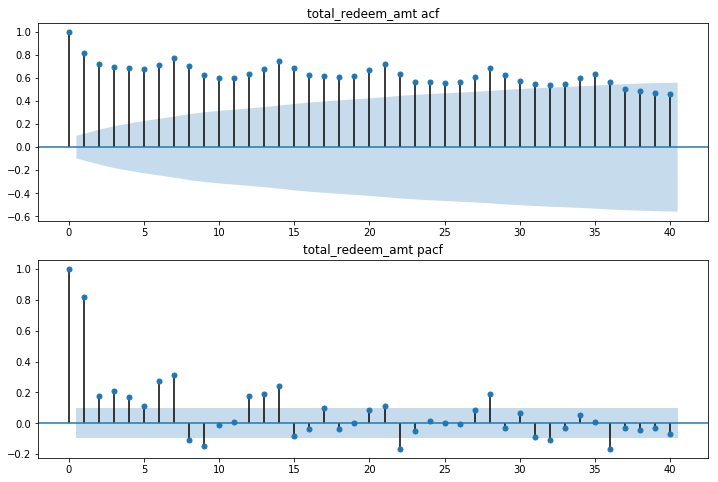

In [77]:
redeem_data_train = pd.DataFrame(data_train['total_redeem_amt'])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(redeem_data_train,lags=40,
                            title='total_redeem_amt acf',ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(redeem_data_train,lags=40,
                            title='total_redeem_amt pacf',ax=ax2)

redeem_data_train = purchase_data_train.astype('float64')

print('begin ARMA');

In [78]:
warnings.filterwarnings("ignore")
redeem_arma_model = sm.tsa.ARMA(redeem_data_train, (7, 3)).fit()
redeem_resid = redeem_arma_model.resid;

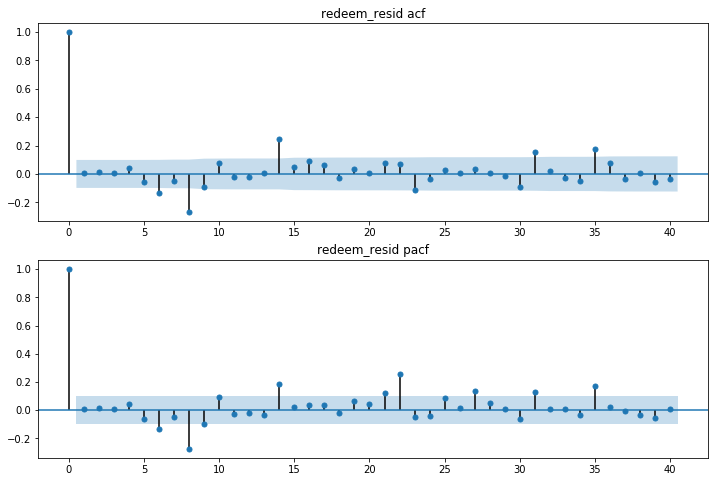

In [79]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(redeem_resid.values.squeeze(),
                    lags=40, title='redeem_resid acf', ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(redeem_resid, lags=40,
                    title='redeem_resid pacf', ax=ax2)

In [80]:
print(sm.stats.durbin_watson(redeem_resid.values))

1.9695447274865165


Text(0.5,1,'redeem_resid Q-Q')

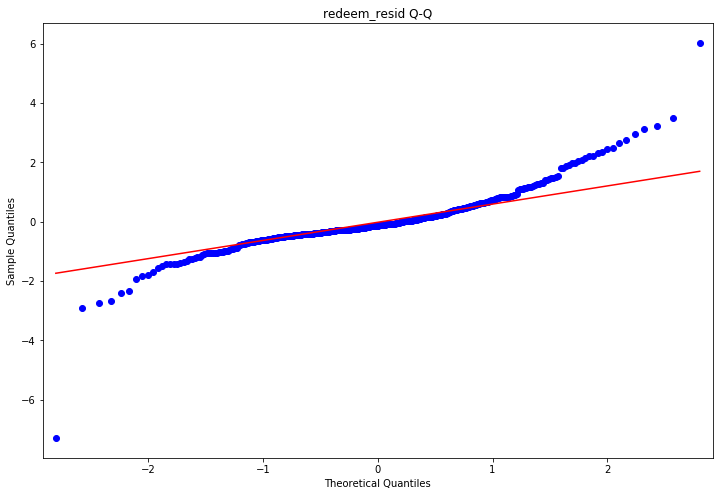

In [81]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.qqplot(redeem_resid, line='q', ax=ax, fit=True)
plt.title('redeem_resid Q-Q')

redeem_error: [0.14736614 0.20418036 0.24228037 0.18553795 0.06572431 0.27316476
 0.03972953 0.06301489 0.38712305 0.01165418 0.1134265  0.49149175
 0.16308138 0.00713579 0.30681301 0.52405033 0.08440823 0.23629048
 0.3886871  0.27102621 0.36225905 0.09567917 0.15369612 0.07930782
 0.01380894 0.24872028 0.32273927 0.21660107 0.09596139 0.41088259
 0.16471268]
MAE: 0.20550176465155576 VAR: 0.01960577790866692 STD: 0.14002063386753724


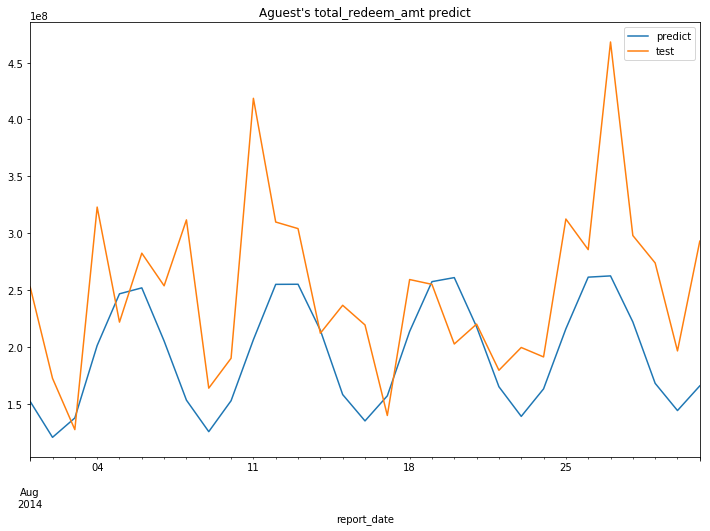

In [82]:
redeem_predict = redeem_arma_model.predict('2014-08-01', '2014-08-31', dynamic=False);
fig, ax = plt.subplots(figsize=(12, 8));
redeem_predict.plot(ax=ax, label='predict');
data_test['total_redeem_amt'].plot(ax=ax, label='test');
plt.legend();
plt.title('Aguest\'s total_redeem_amt predict')
plt.draw();
purchase_error = np.divide(np.abs(np.array(data_test['total_redeem_amt'])
- np.array(redeem_predict).T), np.array(data_test['total_redeem_amt']))
print('redeem_error:',redeem_error)
print('MAE:', redeem_error.mean(),'VAR:',redeem_error.var(),'STD:',redeem_error.std())
plt.show();

AIC & BIC to decide p,q

In [ ]:
#AIC,BIC, purchase as an example
p_min = 0
d_min = 0
q_min = 0
p_max = 14
d_max = 0
q_max = 14

plt.show()
# Initialize a DataFrame to store the results,，foucus on BIC
results_bic = pd.DataFrame(index=['AR{}'.format(i)
                                  for i in range(p_min, p_max + 1)],
                           columns=['MA{}'.format(i)
                                    for i in range(q_min, q_max + 1)])
for p, d, q in itertools.product(range(p_min, p_max + 1),
                                 range(d_min, d_max + 1),
                                 range(q_min, q_max + 1)):
    if p == 0 and d == 0 and q == 0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.ARIMA(purchase_data_train,
                    order=(p, d, q),)
        results = model.fit()
        results_bic.loc['AR{}'.format(p),
                    'MA{}'.format(q)] = results.bic
    except: continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(results_bic,mask=results_bic.isnull(),
                 ax=ax,annot=True,fmt='.2f', )
ax.set_title('BIC')
plt.show();

train_results = sm.tsa.arma_order_select_ic(purchase_data_train, ic=[ 'aic', 'bic'], trend= 'nc', max_ar= 8, max_ma= 8)
print( 'AIC', train_results.aic_min_order)
print( 'BIC', train_results.bic_min_order) 
